In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
df=pd.read_csv("/content/heart.csv")

In [12]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [14]:
df.shape

(1025, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [16]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [18]:
df.isnull().sum().sum()

np.int64(0)

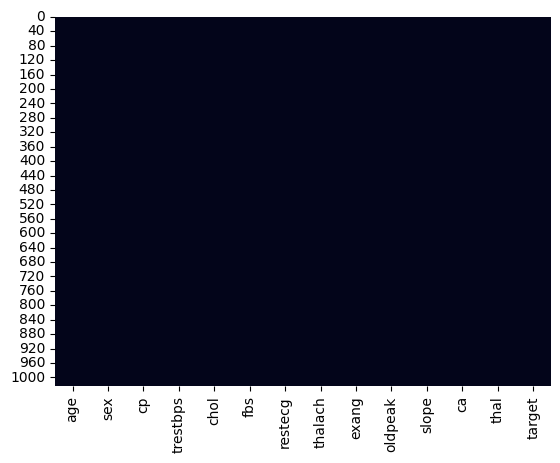

In [20]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
# Checking the distribution of target 🎯 variables
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64


# 0 ------> Defective From Heart ❤ Disease

# 1 ------> Healthy ♥

# Spliting The Feature And Target 🎯 Columns From Dataset's

In [24]:
X=df.drop(columns='target',axis=1)
Y=df['target']

In [25]:
print(X)

      age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0      52    1   0       125   212  ...      0      1.0      2   2     3
1      53    1   0       140   203  ...      1      3.1      0   0     3
2      70    1   0       145   174  ...      1      2.6      0   0     3
3      61    1   0       148   203  ...      0      0.0      2   1     3
4      62    0   0       138   294  ...      0      1.9      1   3     2
...   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
1020   59    1   1       140   221  ...      1      0.0      2   0     2
1021   60    1   0       125   258  ...      1      2.8      1   1     3
1022   47    1   0       110   275  ...      1      1.0      1   1     2
1023   50    0   0       110   254  ...      0      0.0      2   0     2
1024   54    1   0       120   188  ...      0      1.4      1   1     3

[1025 rows x 13 columns]


In [26]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


# Spliting The Data Training Data And Testing Data

In [27]:
# Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0
586,64,1,2,125,309,0,1,131,1,1.8,1,0,3
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2
462,52,1,3,118,186,0,0,190,0,0.0,1,0,1
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,63,1,0,130,254,0,0,147,0,1.4,1,1,3
906,42,1,0,140,226,0,1,178,0,0.0,2,0,2
1002,66,1,0,112,212,0,0,132,1,0.1,2,1,2
966,58,1,0,128,259,0,0,130,1,3.0,1,2,3


In [30]:
Y_train

,target
14,0
586,0
16,1
462,1
186,0
...,...
221,0
906,1
1002,0
966,0


# Model Training

In [44]:
Heart_Disease_Model=LogisticRegression()

In [46]:
# Training The Logistics Model With Traning Model
Heart_Disease_Model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [47]:
# Accuracy Score On Training Data
X_train_prediction=Heart_Disease_Model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [37]:
print('Accuracy On Training Data : ',training_data_accuracy)

Accuracy On Training Data :  0.8524390243902439


In [48]:
# Accuracy Score On Test Data
X_test_prediction=Heart_Disease_Model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [39]:
print('Accuracy On Test Data : ',test_data_accuracy)

Accuracy On Test Data :  0.8048780487804879


# Make A Predictive System

In [49]:
Input_data=(40,0,1,150,207,0,0,176,0,1.6,2,0,2)

# Change The Input Data To Numpy Array
input_data_as_numpy_array=np.asarray(Input_data)

# Reshape The Numpy Array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=Heart_Disease_Model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The Person Does Not Have A Heart Disease')
else:
  print('The Person Have A Heart Disease')

[1]
The Person Have A Heart Disease


In [50]:
import joblib


In [51]:
joblib.dump(Heart_Disease_Model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']